## Demo
Rosenbaum's test implementation.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
import networkx as nx
import pandas as pd
import sys
sys.path.append("..")
from src import *
import matplotlib.pyplot as plt

will use the CPU to calculate the distance matrix.
will use the CPU to calculate the distance matrix.


In [3]:
help(rosenbaum)

Help on function rosenbaum in module src.rosenbaum:

rosenbaum(adata, group_by, test_group, reference=None, metric='sqeuclidean', rank=False, k=None, use_nx=False)
    Perform Rosenbaum's matching-based test for checking the association between two groups 
    using a distance-based matching approach.
    
    Parameters:
    -----------
    data : anndata.AnnData or pd.DataFrame
        The input data containing the samples and their respective features. If the input is an
        `AnnData` object, the samples and their corresponding features should be stored in `data.X` and the
        group labels in `data.obs[group_by]`. If using a `pandas.DataFrame`, the group labels should be in the
        column specified by `group_by`, and the feature matrix should be the remaining columns.
    
    group_by : str
        The column in `data.obs` or `data` (in case of a `pandas.DataFrame`) containing the group labels.
        The values of this column should include the `test_group` and potent

In [4]:
samples_A = [np.random.normal(0, 1, 2) for _ in range(20)]
samples_B = [np.random.normal(0, 1, 2) for _ in range(10)]
samples_C = [np.random.normal(5, 1, 2) for _ in range(11)]

groups = ["A"] * 20 + ["B"] * 10 # + ["C"] * 11
samples = np.array(samples_A + samples_B) # + samples_C)
adata = ad.AnnData(samples)
adata.obs["Group"] = groups

In [5]:
kNN(adata, 5, metric="sqeuclidean")

calculating PCA and kNN graph.


/data/bionets/je30bery/conda/envs/graphtool/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
adata

AnnData object with n_obs × n_vars = 30 × 2
    obs: 'Group'
    uns: 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [7]:
nx_G = construct_graph_via_kNN_nx(adata.copy())
nx_matching = match_nx(nx_G)
p_val, z, support  = rosenbaum(adata, group_by="Group", test_group="A", reference="B", k=5, use_nx=True)
print("P-value", p_val, "Z-score", z, "Relative support", support)

30
XMatch_group
test         20
reference    10
Name: count, dtype: int64
calculating PCA and kNN graph.
matching samples.
counting cross matches.
P-value 0.13003498250874598 Z-score -1.668910769901955 Relative support 1.0


/data/bionets/je30bery/rosenbaum_test/notebooks/../src/rosenbaum.py:151: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")


In [8]:
gt_G = construct_graph_via_kNN(adata.copy())
gt_matching = match(gt_G, adata.obsp["distances"].shape[0])
p_val, z, support = rosenbaum(adata, group_by="Group", test_group="A", reference="B", k=5, use_nx=False)
print("P-value", p_val, "Z-score", z, "Relative support", support)

matching.
30
XMatch_group
test         20
reference    10
Name: count, dtype: int64
calculating PCA and kNN graph.
matching samples.
matching.
counting cross matches.
P-value 0.13003498250874598 Z-score -1.668910769901955 Relative support 1.0


/data/bionets/je30bery/rosenbaum_test/notebooks/../src/rosenbaum.py:151: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")


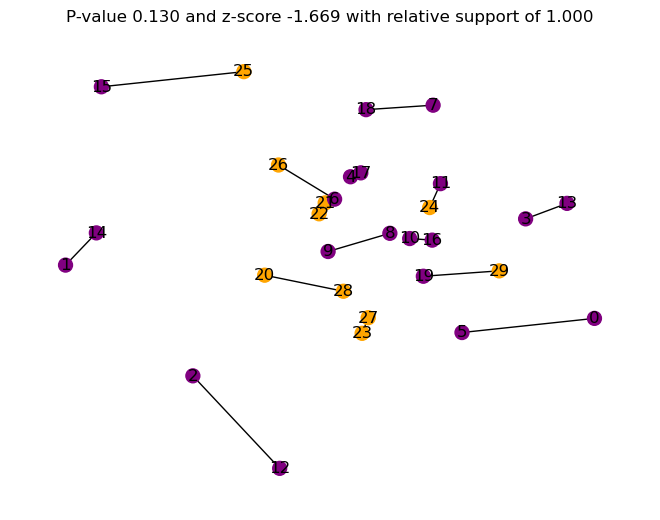

In [9]:
used_elements = list(chain.from_iterable(nx_matching))
G = nx.Graph()
G.add_edges_from(nx_matching)
pos = {i: samples[i] for i in used_elements}
labels = {i: i for i in used_elements}
colors = adata.obs["Group"].replace({"A": "purple", "B": "orange"}).values[used_elements]
nx.draw(G, pos=pos, node_color=colors, labels=labels, node_size=100)
plt.title(f"P-value {p_val:.3f} and z-score {z:.3f} with relative support of {support:.3f}")
plt.show()

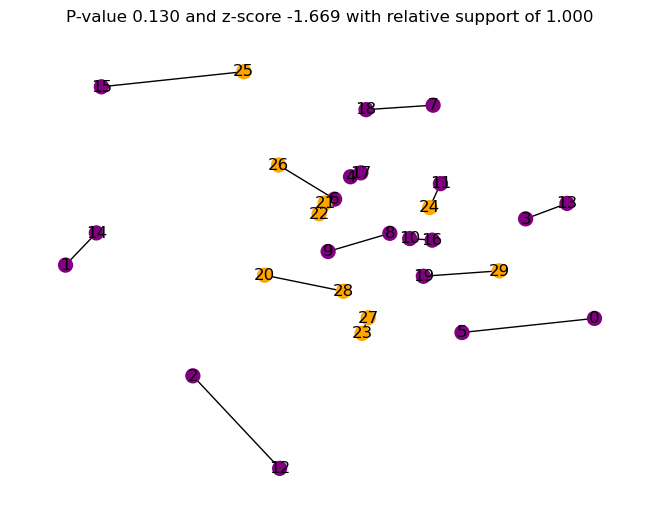

In [10]:
used_elements = list(chain.from_iterable(gt_matching))
G = nx.Graph()
G.add_edges_from(gt_matching)
pos = {i: samples[i] for i in range(len(samples))}
labels = {i: i for i in range(len(samples))}
colors = adata.obs["Group"].replace({"A": "purple", "B": "orange"}).values[used_elements]
nx.draw(G, pos=pos, node_color=colors, labels=labels, node_size=100)
plt.title(f"P-value {p_val:.3f} and z-score {z:.3f} with relative support of {support:.3f}")
plt.show()